In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# this allows plots to appear directly in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
# pip install patsy
# pip install statsmodels
import statsmodels.formula.api as smf
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

from IPython.core.display import display, HTML

In [35]:
# define url
url_0420 = '/Users/shaokuixing/Desktop/whatever/survey50%GenderAge20160420.csv'

# read csv file
rawData = pd.read_csv(url_0420, sep=';', thousands = '.', decimal =',')
#rawData.head(5).transpose()

In [36]:
#rawData.head(1)




In [37]:
# subset recall
recall = rawData[rawData['questionid']==84].reset_index()
recall['recall'] = np.where(recall['ioptiontext']=='Yes',1,0).astype(int)
recall['recall_category'] = np.where(recall['ioptiontext']=='Yes','Yes','No')

# subset interest
interest = rawData[rawData['questionid']==86].reset_index()
interest['interest'] = pd.to_numeric(interest['ioptiontext'], errors='coerce')
interest['interest_category']=np.where(interest['interest']>=4,'High','Low')

# subset intent
intent = rawData[rawData['questionid']==83].reset_index()
intent['intent'] = pd.to_numeric(intent['ioptiontext'], errors='coerce')
intent['intent_category']=np.where(intent['intent'] >= 4 ,'High','Low')

# subset age
age = rawData[rawData['questionid']==90].reset_index()
age=age.rename(columns = {'ioptiontext':'age_category'})

# subset gender
gender = rawData[rawData['questionid']==91].reset_index()
gender=gender.rename(columns = {'ioptiontext':'gender_category'})

In [130]:
# check if any value is null
#interest.interest.isnull().values.any()
# check which column has null value
# df.isnull().any()
# check how many values are null
# interest.totalviewtime.isnull().sum().sum()
# intent[intent['intent_category'] == 0]



In [38]:
# drop unnecessary columns
recall.drop(recall[['ioptiontext','answerid','questionid','questiontext','optionid', 
                 'iscomplete','isrefgroup']],axis=1, inplace=True)
interest.drop(interest[['ioptiontext','answerid','questionid','questiontext','optionid', 
                 'iscomplete','isrefgroup']],axis=1, inplace=True)
intent.drop(intent[['ioptiontext','answerid','questionid','questiontext','optionid', 
              'iscomplete','isrefgroup']],axis=1, inplace=True)
age.drop(age[['answerid','questionid','questiontext','optionid','iscomplete','isrefgroup']],axis=1, inplace=True)
gender.drop(gender[['answerid','questionid','questiontext','optionid','iscomplete','isrefgroup']],axis=1, inplace=True)



In [114]:
# merge data
df = recall.merge(interest, 
on= ['surveyid','answersetid',  'click', 
     'firstinteraction', 'deliveredimp', 'viewableimp','viewableimp_ic','totalviewtime']).merge(intent, on= ['surveyid','answersetid',  'click', 
     'firstinteraction', 'deliveredimp', 'viewableimp','viewableimp_ic','totalviewtime']).merge(age, on= ['surveyid','answersetid',  'click', 
     'firstinteraction', 'deliveredimp', 'viewableimp','viewableimp_ic','totalviewtime']).merge(gender, on= ['surveyid','answersetid',  'click', 
     'firstinteraction', 'deliveredimp', 'viewableimp','viewableimp_ic','totalviewtime'])
# df.isnull().any()



index_x              False
surveyid             False
answersetid          False
click                False
firstinteraction     False
deliveredimp         False
viewableimp          False
viewableimp_ic       False
totalviewtime         True
recall               False
recall_category      False
index_y              False
interest             False
interest_category    False
index_x              False
intent               False
intent_category      False
index_y              False
age_category         False
index                False
gender_category      False
dtype: bool

In [40]:
# create function to transform age column into numerical
def age_trans(x):
    if x['age_category'] == "15-24":
        val = 1
    elif x['age_category'] == "25-34":
        val = 2
    elif x['age_category'] == "35-44":
        val = 3
    elif x['age_category'] == "45-54":
        val = 4
    elif x['age_category'] == "55-64":
        val = 5
    else:
        val=6
    return val


In [41]:
# apply function and create numerical representation for age categories
df['age'] = df.apply(age_trans, axis=1)


In [42]:
# transform gender into numerical column
df['gender'] = np.where(df['gender_category']=="Male", 1, 0)
# df.sample(n=5, random_state=1)
df1= df[['answersetid', 'recall','interest','intent','age', 'gender','recall_category','interest_category', 
         'intent_category', 'age_category','gender_category',
         'click','firstinteraction','deliveredimp', 'viewableimp', 'viewableimp_ic','totalviewtime']]


In [59]:
df1.is_copy = False
df1.head()


,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewabimp30pct,viewabimp50pct,totalviewtime,avgviewtime
0,218047,1,2,5,1,0,Yes,Low,High,15-24,Female,0,0,4,3,2,9.158,4.579
1,218979,1,2,2,3,0,Yes,Low,Low,35-44,Female,0,0,2,1,1,1.056,1.056
2,219322,0,2,2,2,0,No,Low,Low,25-34,Female,0,0,1,0,0,0.000,0.000
3,219343,1,3,4,1,0,Yes,Low,High,15-24,Female,0,0,1,1,1,6.220,6.220
4,219622,1,1,3,1,0,Yes,Low,Low,15-24,Female,0,0,4,4,2,67.354,33.677


In [72]:
# check if any vaue is null in total view time
df.totalviewtime.isnull().values.any()
# eliminate null values
df1.fillna(0, inplace=True)
# calculate average view time
df1['avgviewtime'] = df1['totalviewtime'].div(df['viewableimp_ic'], axis=0)
# replace inf with nan
df1[np.isinf(df1.avgviewtime)] = np.nan
# eliminate null values
df1.fillna(0, inplace=True)
# change view time into seconds
#df1.is_copy = False
#df1['avgviewtime'] = df1['avgviewtime']/1000
#df1['totalviewtime'] = df1['totalviewtime']/1000
# change column name 
df1=df1.rename(columns = {'viewableimp':'viewabimp30pct'})
df1=df1.rename(columns = {'viewableimp_ic':'viewabimp50pct'})

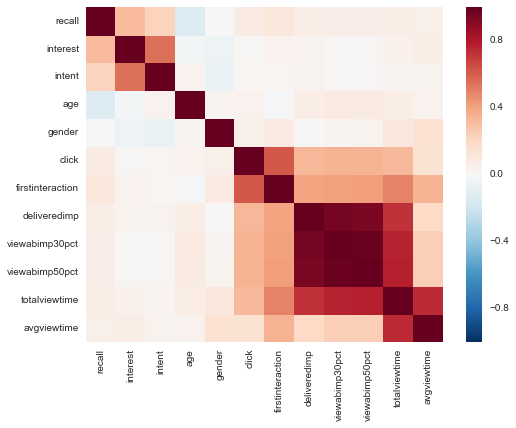

In [73]:
sns.heatmap(df1[df1.columns[1:]].corr(method='spearman'))



In [78]:
# df1[df1.columns[1:]].describe()
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
answersetid,8004,317598.199525,63952.449258,0,285551.750000,322045.500000,352473.50000,506461.000000
recall,8004,0.381684,0.485830,0,0.000000,0.000000,1.00000,1.000000
interest,8004,2.304848,1.271187,0,1.000000,2.000000,3.00000,5.000000
intent,8004,2.475012,1.416862,0,1.000000,2.000000,3.00000,5.000000
age,8004,2.604323,1.587621,0,1.000000,2.000000,4.00000,6.000000
gender,8004,0.426287,0.494567,0,0.000000,0.000000,1.00000,1.000000
click,8004,0.273613,0.932616,0,0.000000,0.000000,0.00000,27.000000
firstinteraction,8004,0.789105,4.858410,0,0.000000,0.000000,1.00000,393.000000
deliveredimp,8004,30.372439,56.401848,0,4.000000,12.000000,33.00000,1026.000000
viewabimp30pct,8004,21.026237,39.030569,0,2.000000,8.000000,23.00000,760.000000


In [86]:
#df1.avgviewtime
df1.avgviewtime.quantile(0.9)

118.62720999999989

In [77]:
# select by index number
# df1.loc[209]

In [101]:
#categorical cut on avgviewtime
labels = [ "{0} - {1}".format(i, i + 1) for i in range(0, 120, 1) ]
print labels
df1['avgVTCategory'] = pd.cut(df1.avgviewtime, range(0, 121, 1), right=False, labels=labels)
df1[['avgviewtime','avgVTCategory']].sample(n=20, random_state=0)



['0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6', '6 - 7', '7 - 8', '8 - 9', '9 - 10', '10 - 11', '11 - 12', '12 - 13', '13 - 14', '14 - 15', '15 - 16', '16 - 17', '17 - 18', '18 - 19', '19 - 20', '20 - 21', '21 - 22', '22 - 23', '23 - 24', '24 - 25', '25 - 26', '26 - 27', '27 - 28', '28 - 29', '29 - 30', '30 - 31', '31 - 32', '32 - 33', '33 - 34', '34 - 35', '35 - 36', '36 - 37', '37 - 38', '38 - 39', '39 - 40', '40 - 41', '41 - 42', '42 - 43', '43 - 44', '44 - 45', '45 - 46', '46 - 47', '47 - 48', '48 - 49', '49 - 50', '50 - 51', '51 - 52', '52 - 53', '53 - 54', '54 - 55', '55 - 56', '56 - 57', '57 - 58', '58 - 59', '59 - 60', '60 - 61', '61 - 62', '62 - 63', '63 - 64', '64 - 65', '65 - 66', '66 - 67', '67 - 68', '68 - 69', '69 - 70', '70 - 71', '71 - 72', '72 - 73', '73 - 74', '74 - 75', '75 - 76', '76 - 77', '77 - 78', '78 - 79', '79 - 80', '80 - 81', '81 - 82', '82 - 83', '83 - 84', '84 - 85', '85 - 86', '86 - 87', '87 - 88', '88 - 89', '89 - 90', '90 - 91', '91 - 92', '92 - 

,avgviewtime,avgVTCategory
4976,12.072000,12 - 13
3710,36.984000,36 - 37
3954,10.216462,10 - 11
5367,6.172000,6 - 7
4021,11.929600,11 - 12
4276,6.645000,6 - 7
7318,44.400316,44 - 45
700,13.207500,13 - 14
3081,0.000000,0 - 1
380,13.928556,13 - 14


In [102]:
# substring column value
#df3.avgVTCategory.str[:3]
df1['avgVTCategory_num']=pd.to_numeric(df1.avgVTCategory.str.split('-').str[0], errors='coerce')
#df1.sample(n=5, random_state=1)
df1.dtypes

answersetid           float64
recall                float64
interest              float64
intent                float64
age                   float64
gender                float64
recall_category        object
interest_category      object
intent_category        object
age_category           object
gender_category        object
click                 float64
firstinteraction      float64
deliveredimp          float64
viewabimp30pct        float64
viewabimp50pct        float64
totalviewtime         float64
avgviewtime           float64
avgVTCategory        category
avgVTCategory_num     float64
dtype: object

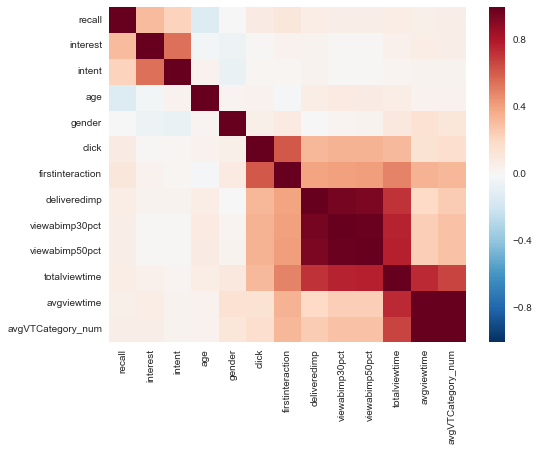

In [99]:
sns.heatmap(df1[df1.columns[1:]].corr(method='spearman'))


In [131]:
from pivottablejs import pivot_ui
#pivot_ui(df1)

In [129]:
# df1.isnull().any()
df1[df1['answersetid'] == 0]


,answersetid,recall,interest,intent,age,gender,recall_category,interest_category,intent_category,age_category,gender_category,click,firstinteraction,deliveredimp,viewabimp30pct,viewabimp50pct,totalviewtime,avgviewtime,avgVTCategory,avgVTCategory_num
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
209,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 - 1,0
